##Load dan Eksplorasi Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/train.csv"
df = pd.read_csv(url)

# Tampilkan 5 baris pertama
print(df.head())

# Info umum dataset
print(df.info())

# Statistik deskriptif
print(df.describe())

# Cek missing values
print("Missing values sebelum imputasi:\n", df.isnull().sum().sort_values(ascending=False).head(10))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

##Visualisasi Data

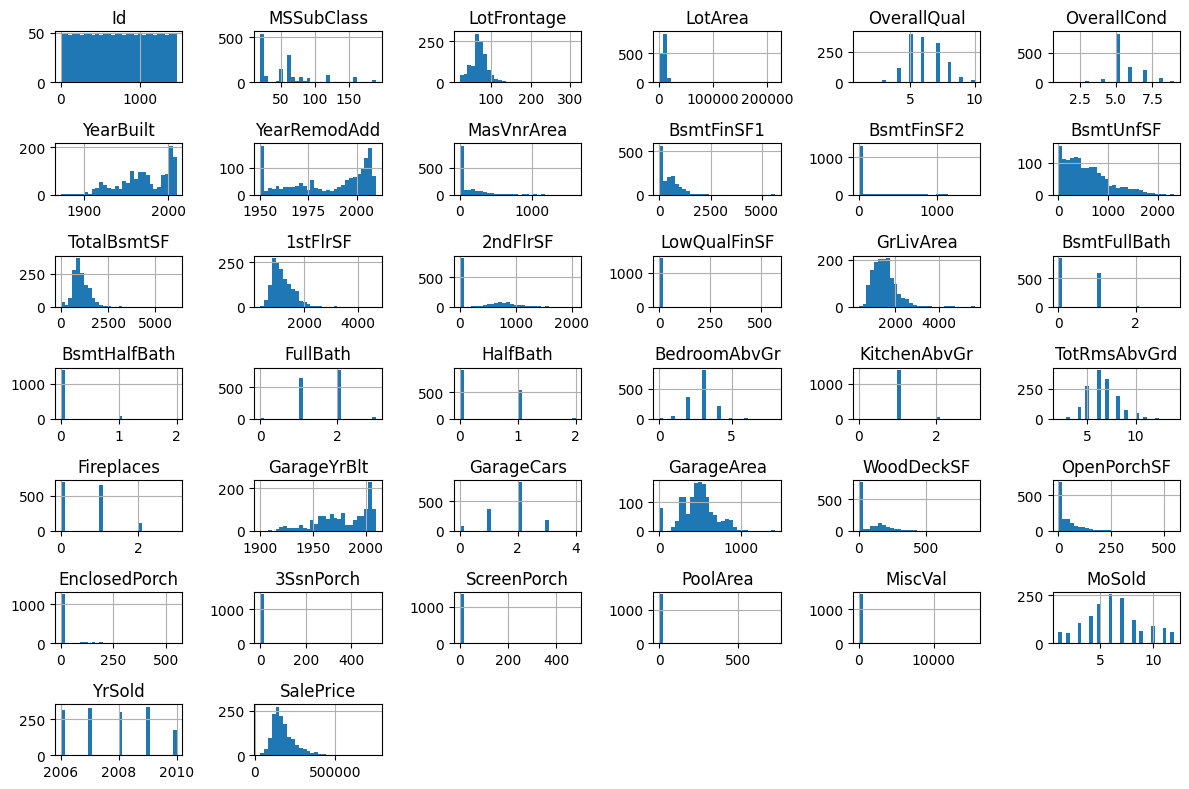

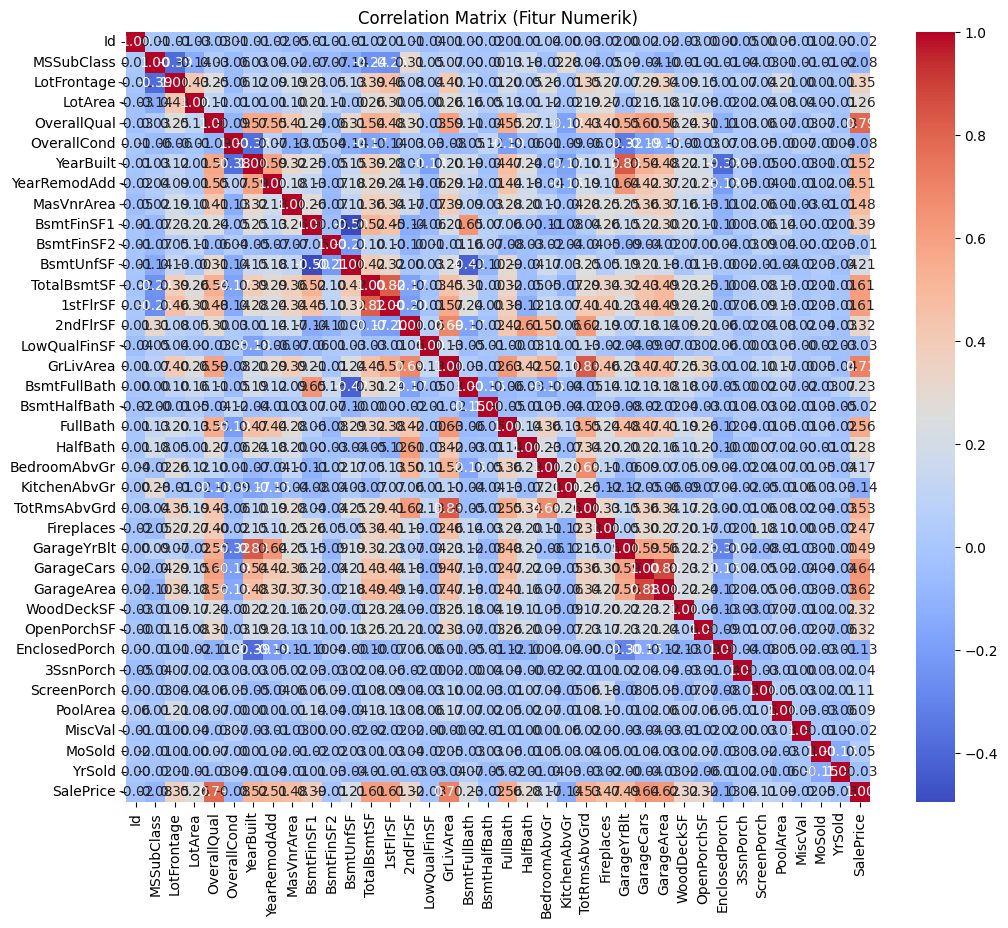

In [7]:
# Visualisasi distribusi fitur numerik
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Fitur Numerik)")
plt.show()

##Feature Engineering

In [8]:
# Buat fitur baru
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']
df['LogGrLivArea'] = np.log1p(df['GrLivArea'])

##Encoding dan Penanganan Missing Values

In [9]:
# One-hot encoding untuk fitur kategorik
df = pd.get_dummies(df, drop_first=True)

# Imputasi missing values menggunakan median
df = df.fillna(df.median(numeric_only=True))

##Pemisahan Fitur dan Target

In [10]:
# Misalnya target-nya adalah 'SalePrice'
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

##Split Data untuk Pengujian

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Training Model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##Evaluasi Model

In [16]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics")
print("MSE       :", mse)
print("RMSE      :", rmse)
print("R-squared :", r2)

Evaluation Metrics
MSE       : 2675239914.1355243
RMSE      : 51722.72144943191
R-squared : 0.6512221459852888


##Penjelasan Matematika

##1. **MSE (Mean Squared Error)**

$$
MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

Rata-rata kuadrat selisih antara nilai aktual dan prediksi.

##2. **RMSE (Root Mean Squared Error)**

$$
RMSE = \sqrt{MSE}
$$

Akar dari MSE, satuannya sama seperti target.

##3. **R² (R-squared)**

$$
R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
$$

Mengukur seberapa baik model menjelaskan variasi data.
